https://catalog.data.gov/dataset/allegheny-county-crash-data

In [1]:
%matplotlib inline
import pandas as pd
import gmplot as gm

In [2]:
df = pd.read_csv('crashdata.csv')
df.head()

C:\Users\Ari\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (79,183) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,ACCESS_CTRL,ROADWAY_COUNTY,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME
0,2.004000e+09,11.0,2.0,2454.0,02454,2004.0,1.0,5.0,257.0,2.0,...,3.0,2.0,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD
1,2.004000e+09,11.0,2.0,2440.0,02440,2004.0,1.0,5.0,1027.0,10.0,...,NaN,2.0,2.0,W,3.0,NaN,35.0,NaN,NaN,COAL VALLEY RD
2,2.004000e+09,11.0,2.0,2203.0,02203,2004.0,1.0,5.0,1839.0,18.0,...,NaN,2.0,2.0,W,2.0,3082,35.0,NaN,NaN,CLINTON FRANKFORT RD
3,2.004000e+09,11.0,2.0,2404.0,02404,2004.0,1.0,6.0,914.0,9.0,...,NaN,2.0,2.0,N,4.0,NaN,25.0,NaN,NaN,NORTH BALPH AV
4,2.004000e+09,11.0,2.0,2419.0,02419,2004.0,1.0,5.0,2230.0,22.0,...,NaN,2.0,2.0,S,4.0,NaN,20.0,NaN,NaN,THORNBERRY DR


In [8]:
(df.iloc[:,183]).head()

0    2032
1     NaN
2    3082
3     NaN
4     NaN
Name: ROUTE, dtype: object

In [11]:
(df.iloc[:,79]).dropna().head()

37      Y
121     Y
275     Y
604     Y
2450    Y
Name: WZ_FLAGGER, dtype: object

In [7]:
df.shape

(157821, 188)

In [8]:
df.describe()

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,ILLUMINATION,...,ROADWAY_CRN,RDWY_SEQ_NUM,ADJ_RDWY_SEQ,ACCESS_CTRL,ROADWAY_COUNTY,LANE_COUNT,ROAD_OWNER,SPEED_LIMIT,SEGMENT,OFFSET
count,1.578210e+05,157821.0,157821.0,157821.000000,157821.000000,157821.000000,157821.000000,157673.000000,157673.000000,157821.000000,...,1.578210e+05,157821.000000,157821.000000,97176.000000,157821.000000,157802.000000,157821.000000,152226.000000,97636.000000,108211.000000
mean,2.010197e+09,11.0,2.0,2286.888735,2010.044722,6.578871,4.158845,1485.839966,14.559405,1.749989,...,2.010197e+09,3.034653,3.209978,2.287561,2.033633,3.762018,2.762719,35.012580,224.246938,992.462846
std,3.701085e+06,0.0,0.0,121.001490,3.784427,3.585920,1.966941,1386.899404,13.777689,1.092678,...,3.701085e+06,0.227713,0.440465,1.047198,1.430375,12.185600,1.154233,11.235706,236.730709,985.252606
min,2.004000e+09,11.0,2.0,2101.000000,2004.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,2.004000e+09,3.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.007042e+09,11.0,2.0,2207.000000,2007.000000,3.000000,2.000000,850.000000,8.000000,1.000000,...,2.007042e+09,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,25.000000,40.000000,0.000000
50%,2.010082e+09,11.0,2.0,2301.000000,2010.000000,7.000000,4.000000,1420.000000,14.000000,1.000000,...,2.010082e+09,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,35.000000,120.000000,750.000000
75%,2.013119e+09,11.0,2.0,2407.000000,2013.000000,10.000000,6.000000,1758.000000,17.000000,3.000000,...,2.013119e+09,3.000000,3.000000,3.000000,2.000000,2.000000,4.000000,40.000000,340.000000,1675.000000
max,2.017032e+09,11.0,2.0,2491.000000,2016.000000,12.000000,7.000000,9999.000000,99.000000,9.000000,...,2.017032e+09,10.000000,10.000000,3.000000,66.000000,99.000000,9.000000,75.000000,8046.000000,5893.000000


In [25]:
df['FATAL_COUNT'].value_counts()
#Look at fatalities of accidents

0.0    156963
1.0       804
2.0        47
3.0         7
Name: FATAL_COUNT, dtype: int64

In [26]:
df['HOUR_OF_DAY'].head()

0     2.0
1    10.0
2    18.0
3     9.0
4    22.0
Name: HOUR_OF_DAY, dtype: float64

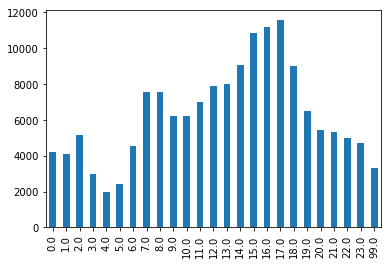

In [32]:
df['HOUR_OF_DAY'].value_counts().sort_index().plot(kind = 'bar')
#What time of day are accidents most common?

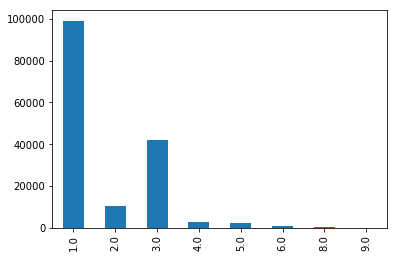

In [33]:
df['ILLUMINATION'].value_counts().sort_index().plot(kind = 'bar')

In [5]:
light = df[['HOUR_OF_DAY', 'ILLUMINATION']]
light = light[light['HOUR_OF_DAY'] < 25]
light = light.set_index('HOUR_OF_DAY').sort_index()
light.ILLUMINATION.value_counts()

1.0    97032
3.0    41462
2.0     9957
4.0     2558
5.0     2255
6.0      751
8.0      303
9.0       25
Name: ILLUMINATION, dtype: int64

In [35]:
lat = df['DEC_LAT'].dropna().head(50).tolist()
lon = df['DEC_LONG'].dropna().head(50).tolist()

In [40]:
gmap = gm.GoogleMapPlotter(lat[0],lon[0],10)
gmap.scatter(lat,lon, color = 'k', marker=True)
gmap.draw("scatter.html")

In [29]:
lat = df['DEC_LAT'].dropna().tolist()
lon = df['DEC_LONG'].dropna().tolist()

In [32]:
#double lat and lon before heatmap
lat = lat + lat
lon = lon + lon

In [34]:
gmap = gm.GoogleMapPlotter(lat[0],lon[0],17) #initialize zoom = 15, 10 fits all data
#gmap.scatter(lat,lon,'#3B0B39', size=4000, marker=False)
#gmap.scatter(lat,lon, 'k', marker=True)

gmap.heatmap(lat,lon)

gmap.draw("mymap.html")